In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
cols_demos = [
    'MatchId',
    'MapName' ,
    'WinnerId' ,
    'WinnerScore' ,
    'WinnerFirstHalfScore' ,
    'WinnerSecondHalfScore' ,
    'WinnerFirstHalfSide' ,
    'WinnerOTScore' ,
    'LoserId' ,
    'LoserScore' ,
    'LoserFirstHalfScore' ,
    'LoserSecondHalfScore' ,
    'LoserFirstHalfSide' ,
    'LoserOTScore' ,
    'DemoParsed' ,
    'Created' ,
    'Updated']
cols_map_picks = [
    'MatchId',
    'MapName',
    'DecisionOrder',
    'DecisionTeamId',
    'OtherTeamId',
    'Decision',
    'Created',
    'Updated']
cols_matches = [
    'MatchId',
    'HLTVMatchId',
    'CompetitionId',
    'HLTVLink',
    'MatchType',
    'MatchDate',
    'MatchTime',
    'Stars',
    'Slug',
    'WinnerId',
    'WinnerScore',
    'LoserId',
    'LoserScore',
    'Created',
    'Updated']
cols_teams = [
    'TeamId',
    'HLTVTeamId',
    'HLTVLink',
    'TeamName',
    'Country',
    'Twitter',
    'Facebook',
    'Created',
    'Updated']

demos = pd.read_csv('../data/demos.csv',names = cols_demos)
map_picks = pd.read_csv('../data/map_picks.csv',names = cols_map_picks)
matches = pd.read_csv('../data/matches.csv',names = cols_matches)
teams = pd.read_csv('../data/teams.csv',names = cols_teams)

In [50]:
# All team IDs
team_record = pd.DataFrame(teams['TeamId'].unique(),columns=['TeamId'])
# Wins and losses by team ID
wins = demos['WinnerId'].value_counts()
losses = demos['LoserId'].value_counts()
# merge wins and losses 
team_record = team_record.merge(wins,left_on='TeamId',right_index=True,how='left').fillna(0).astype(int)
team_record = team_record.merge(losses,left_on='TeamId',right_index=True,how='left').fillna(0).astype(int)
team_record.rename(columns={"WinnerId": "Wins", "LoserId": "Losses"},inplace=True)
team_record['Matches'] = team_record['Wins']+team_record['Losses'].astype(int)
team_record['Win_percentage'] = (team_record['Wins']/team_record['Matches']).fillna(0)



### Matches played distribution

Teams in database:  636
Teams with 0 matches:  10
Teams with 5+ matches:  401
Teams with 10+ matches:  307
Teams with 50+ matches:  139
Teams with 100+ matches:  92
Teams with 200+ matches:  34


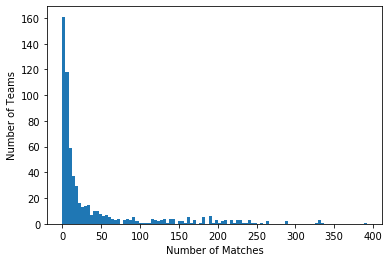

In [54]:
plt.hist(team_record['Matches'],bins=100)
plt.ylabel('Number of Teams')
plt.xlabel('Number of Matches')
print("Teams in database: ",team_record.shape[0])
print("Teams with 0 matches: ",(team_record['Matches']==0).sum())
print("Teams with 5+ matches: ",(team_record['Matches']>5).sum())
print("Teams with 10+ matches: ",(team_record['Matches']>10).sum())
print("Teams with 50+ matches: ",(team_record['Matches']>50).sum())
print("Teams with 100+ matches: ",(team_record['Matches']>100).sum())
print("Teams with 200+ matches: ",(team_record['Matches']>200).sum())

### Team win percentage distribution
I've removed teams with fewer than min_matches matches.

In [ ]:
min_matches = 5
team_record_overmin = team_record[team_record['Matches']>min_matches]

Text(0, 0.5, 'Number of teams')

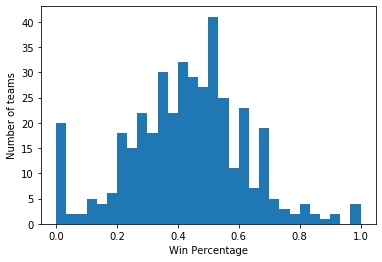

In [53]:
plt.hist(team_record_overmin['Win_percentage'],bins=30)
plt.xlabel('Win Percentage')
plt.ylabel('Number of teams')

### Map Selection and Veto percentage by team

In [9]:
matches

,MatchId,HLTVMatchId,CompetitionId,HLTVLink,MatchType,MatchDate,MatchTime,Stars,Slug,WinnerId,WinnerScore,LoserId,LoserScore,Created,Updated
0,1,2347653,1,https://www.hltv.org/matches/2347653/gladiator...,Online,2021-04-01,16:00:00,0,gladiators-vs-caronte-republeague-tipos-season...,3,2,1,0,2021-04-09 18:45:36,2021-04-09 18:45:36
1,2,2347655,1,https://www.hltv.org/matches/2347655/spirit-ac...,Online,2021-04-01,18:30:00,0,spirit-academy-vs-caronte-republeague-tipos-se...,3,2,2,0,2021-04-09 18:45:39,2021-04-09 18:45:39
2,3,2347654,1,https://www.hltv.org/matches/2347654/spirit-ac...,Online,2021-04-01,16:00:00,0,spirit-academy-vs-quantum-bellator-fire-republ...,2,2,7,0,2021-04-09 18:45:44,2021-04-09 18:45:44
3,4,2347570,4,https://www.hltv.org/matches/2347570/forze-vs-...,Online,2021-04-01,12:00:00,0,forze-vs-sprout-snow-sweet-snow-3,6,2,12,0,2021-04-09 18:45:44,2021-04-09 18:45:44
4,5,2347634,3,https://www.hltv.org/matches/2347634/movistar-...,Online,2021-04-01,20:00:00,0,movistar-riders-vs-lyngby-vikings-esea-advance...,9,2,5,0,2021-04-09 18:45:49,2021-04-09 18:45:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6278,6279,2347565,4,https://www.hltv.org/matches/2347565/sangal-vs...,Online,2021-03-31,15:00:00,0,sangal-vs-extremum-snow-sweet-snow-3,18,2,13,0,2021-04-09 22:42:02,2021-04-09 22:42:02
6279,6280,2347563,4,https://www.hltv.org/matches/2347563/forze-vs-...,Online,2021-03-31,12:00:00,0,forze-vs-winstrike-snow-sweet-snow-3,103,2,12,0,2021-04-09 22:42:07,2021-04-09 22:42:07
6280,6281,2347440,549,https://www.hltv.org/matches/2347440/paradox-v...,Online,2021-03-31,13:45:00,0,paradox-vs-rot-lpl-pro-league-season-7,41,2,394,0,2021-04-09 22:42:08,2021-04-09 22:42:08
6281,6282,2347562,4,https://www.hltv.org/matches/2347562/sinners-v...,Online,2021-03-31,12:10:00,0,sinners-vs-anonymo-snow-sweet-snow-3,8,2,23,0,2021-04-09 22:42:10,2021-04-09 22:42:10
